## 1. Giới thiệu dataset

- Đây là tập dữ liệu BankChurners — một bộ dữ liệu giao dịch và thông tin khách hàng của ngân hàng.

- Mỗi dòng tương ứng với một khách hàng, đi kèm nhiều đặc trưng mô tả hành vi sử dụng thẻ tín dụng.

- Dataset được dùng để phân tích và dự đoán khả năng rời bỏ dịch vụ (churn) của khách hàng.


## 2. Khám phá dữ liệu



In [16]:
# 01. Import thư viện cần thiết

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập hiển thị đồ họa
%matplotlib inline
plt.style.use('ggplot')  


In [ ]:
# 02. Load dữ liệu CSV & phát hiện cột số tự động

file_path = '../data/raw/BankChurners.csv'
# Đọc dữ liệu
with open(file_path, 'r') as f:
    lines = f.readlines()
header = lines[0].strip().split(',')
data_raw = [line.strip().split(',') for line in lines[1:]]

# Chuyển sang NumPy object array tạm thời
data_temp = np.array(data_raw, dtype=object)

# Lọc các cột số
num_idx = []
for i in range(data_temp.shape[1]):
    col = data_temp[:, i]
    # Nếu tất cả các giá trị trừ header có thể chuyển sang float hoặc missing
    is_numeric = True
    for val in col:
        try:
            float(val)
        except:
            is_numeric = False
            break
    if is_numeric:
        num_idx.append(i)
num_cols = [header[i] for i in num_idx]

# Chuyển dữ liệu cột số sang float, giữ cột chữ là string
data = []
for row in data_raw:
    new_row = []
    for i, val in enumerate(row):
        if i in num_idx:
            try:
                new_row.append(float(val))
            except:
                new_row.append(np.nan)
        else:
            new_row.append(val)
    data.append(new_row)

data = np.array(data, dtype=object)

print("Kích thước dữ liệu (số dòng và số cột):", data.shape)
print("Các cột có type là số:", num_cols)


Kích thước dữ liệu (số dòng và số cột): (10127, 23)
Các cột có type là số: ['"CLIENTNUM"', '"Customer_Age"', '"Dependent_count"', '"Months_on_book"', '"Total_Relationship_Count"', '"Months_Inactive_12_mon"', '"Contacts_Count_12_mon"', '"Credit_Limit"', '"Total_Revolving_Bal"', '"Avg_Open_To_Buy"', '"Total_Amt_Chng_Q4_Q1"', '"Total_Trans_Amt"', '"Total_Trans_Ct"', '"Total_Ct_Chng_Q4_Q1"', '"Avg_Utilization_Ratio"', '"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"', '"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"']


In [17]:
# 03. Thống kê mô tả cơ bản cho cột số (bảng)

num_data = data[:, num_idx].astype(float)
# Tính các thống kê
mean = np.nanmean(num_data, axis=0)
median = np.nanmedian(num_data, axis=0)
std = np.nanstd(num_data, axis=0)
min_val = np.nanmin(num_data, axis=0)
max_val = np.nanmax(num_data, axis=0)

# Stack các thống kê lại thành một mảng 2D
stats_table = np.column_stack((mean, median, std, min_val, max_val))

# In header
print(f"{'Feature':30s} {'Mean':>15s} {'Median':>15s} {'Std':>15s} {'Min':>15s} {'Max':>15s}")
print("-"*110)

max_len = 25  # số ký tự tối đa hiển thị
for i, col in enumerate(num_cols):
    col_name = (col[:max_len-3] + '...') if len(col) > max_len else col
    print(f"{col_name:30s} {stats_table[i,0]:15.2f} {stats_table[i,1]:15.2f} {stats_table[i,2]:15.2f} {stats_table[i,3]:15.2f} {stats_table[i,4]:15.2f}")


Feature                                   Mean          Median             Std             Min             Max
--------------------------------------------------------------------------------------------------------------
"CLIENTNUM"                       739177606.33    717926358.00     36901961.36    708082083.00    828343083.00
"Customer_Age"                           46.33           46.00            8.02           26.00           73.00
"Dependent_count"                         2.35            2.00            1.30            0.00            5.00
"Months_on_book"                         35.93           36.00            7.99           13.00           56.00
"Total_Relationship_Co...                 3.81            4.00            1.55            1.00            6.00
"Months_Inactive_12_mon"                  2.34            2.00            1.01            0.00            6.00
"Contacts_Count_12_mon"                   2.46            2.00            1.11            0.00            6.00
"

Feature                          Missing count
--------------------------------------------------
"CLIENTNUM"                                  0
"Customer_Age"                               0
"Dependent_count"                            0
"Months_on_book"                             0
"Total_Relationship_Co...                    0
"Months_Inactive_12_mon"                     0
"Contacts_Count_12_mon"                      0
"Credit_Limit"                               0
"Total_Revolving_Bal"                        0
"Avg_Open_To_Buy"                            0
"Total_Amt_Chng_Q4_Q1"                       0
"Total_Trans_Amt"                            0
"Total_Trans_Ct"                             0
"Total_Ct_Chng_Q4_Q1"                        0
"Avg_Utilization_Ratio"                      0
"Naive_Bayes_Classifie...                    0
"Naive_Bayes_Classifie...                    0

Phân phối Attrition_Flag:
Attrition_Flag            Count     Percent (%)
----------------------------

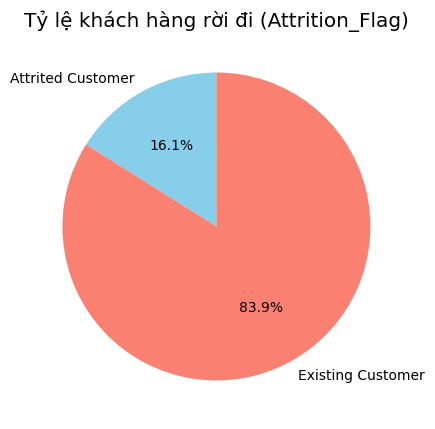

In [18]:
# 04. Kiểm tra missing values & phân phối class 

# 1. Missing values cho cột số
missing_counts = np.sum(np.isnan(num_data), axis=0)
print(f"{'Feature':30s} {'Missing count':>15s}")
print("-"*50)
for i, col in enumerate(num_cols):
    col_name = col if len(col) <= 25 else col[:22] + "..."  # cắt tên >25 ký tự
    print(f"{col_name:30s} {missing_counts[i]:15d}")

# 2. Phân phối Attrition_Flag dạng bảng
# Xử lý header để loại bỏ dấu "
header_clean = [h.strip().replace('"','') for h in lines[0].strip().split(',')]
attr_idx = header_clean.index('Attrition_Flag')

# Lấy cột Attrition_Flag từ data_raw
attrition_flag = np.array([row[attr_idx].replace('"','') for row in data_raw])
unique, counts = np.unique(attrition_flag, return_counts=True)

# Tính phần trăm
percent = counts / len(attrition_flag) * 100

# Stack thành bảng
attr_table = np.column_stack((unique, counts, percent))

# In bảng phân phối
print("\nPhân phối Attrition_Flag:")
print(f"{'Attrition_Flag':20s} {'Count':>10s} {'Percent (%)':>15s}")
print("-"*50)
for i in range(len(unique)):
    print(f"{attr_table[i,0]:20s} {int(attr_table[i,1]):10d} {float(attr_table[i,2]):15.2f}")

# 3. Pie chart
plt.figure(figsize=(5,5))
plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90, colors=['skyblue','salmon'])
plt.title("Tỷ lệ khách hàng rời đi (Attrition_Flag)")
plt.show()


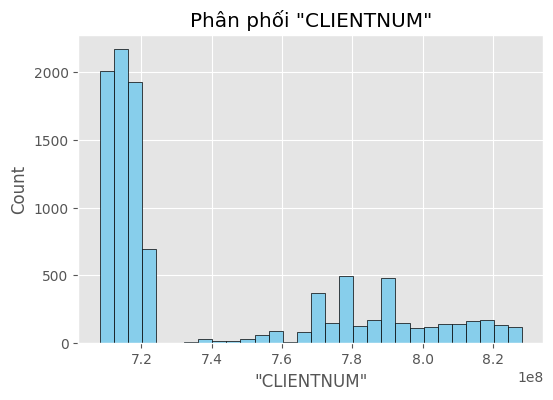

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


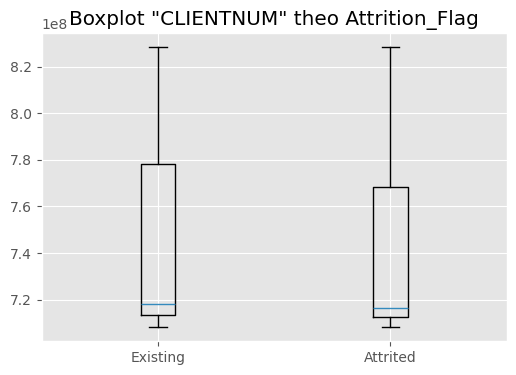

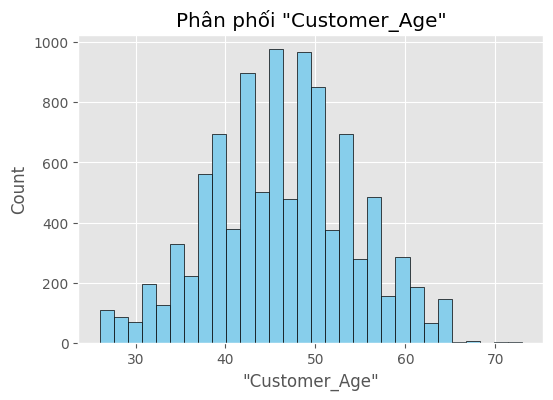

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


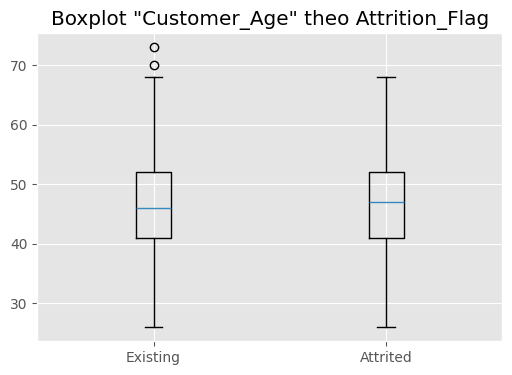

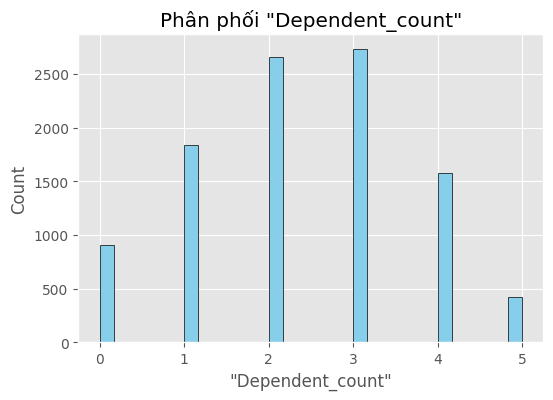

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


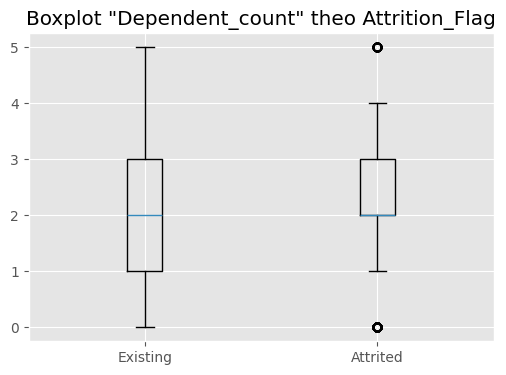

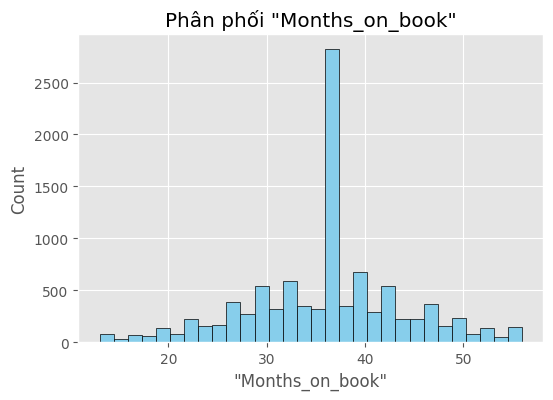

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


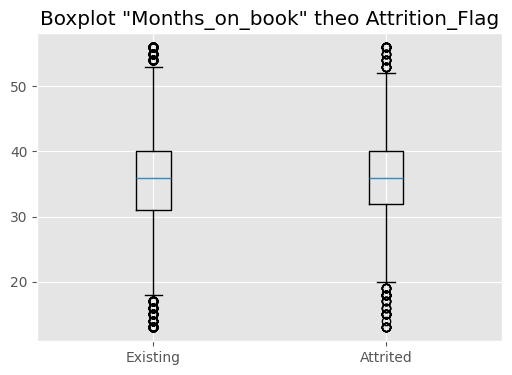

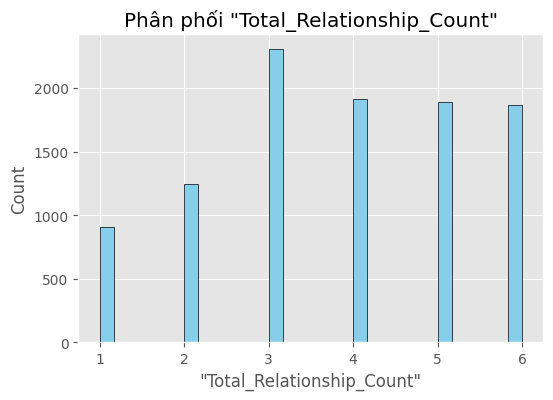

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


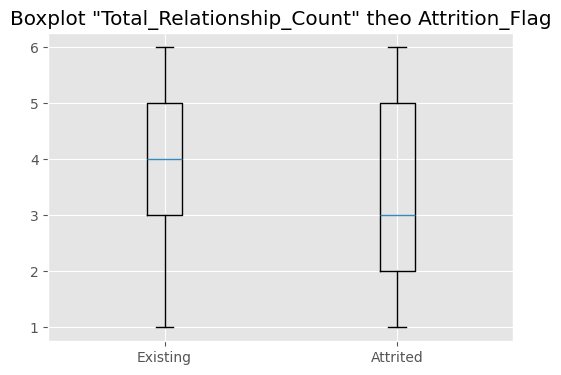

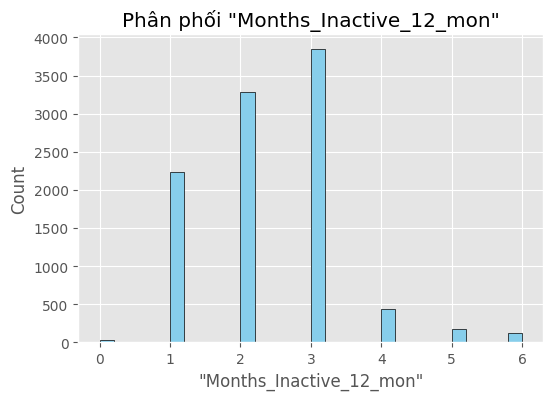

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


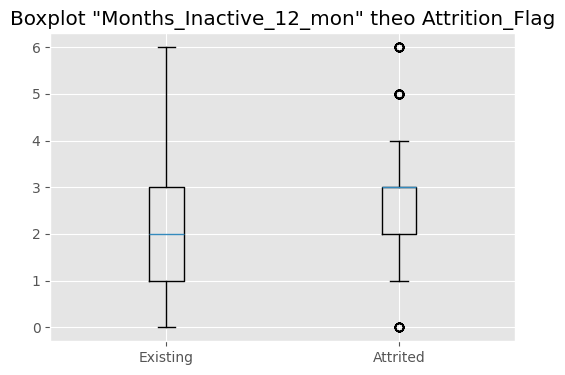

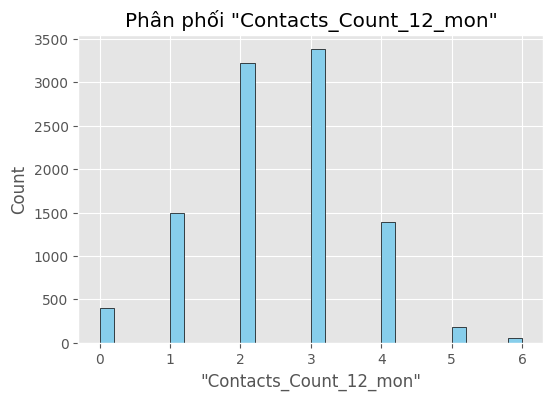

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


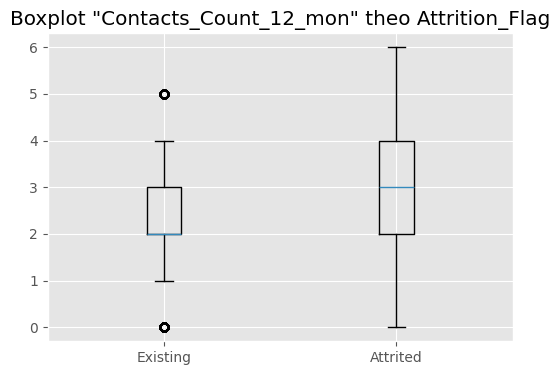

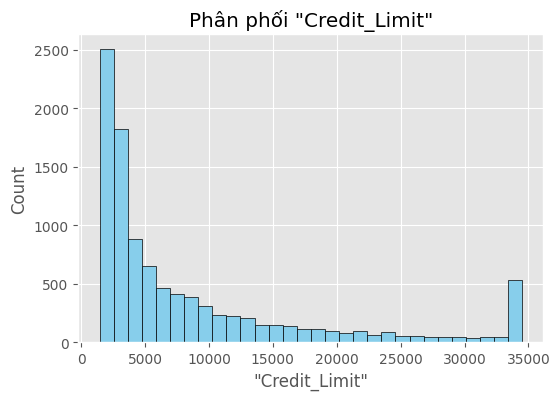

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


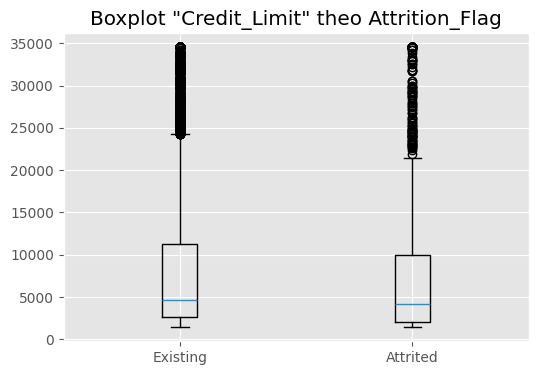

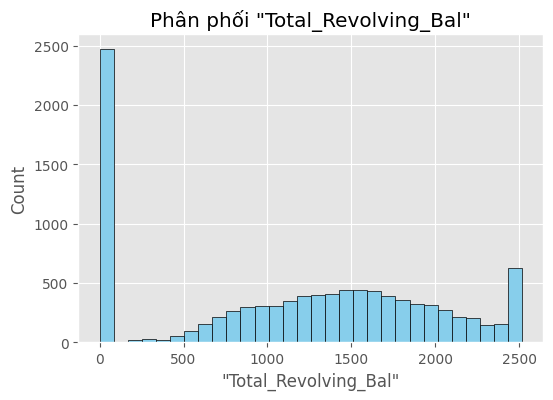

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


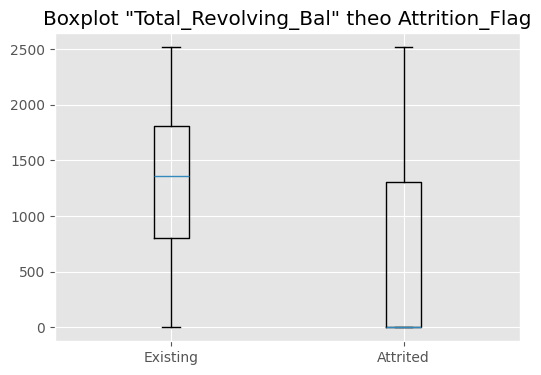

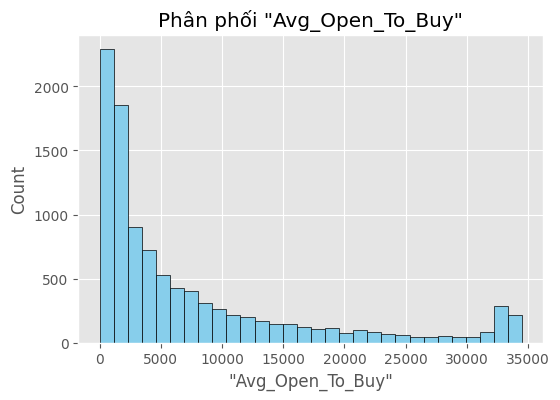

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


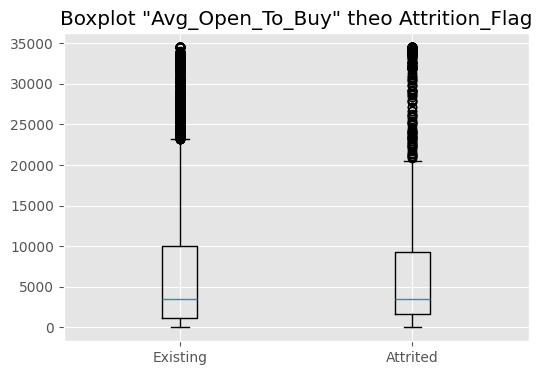

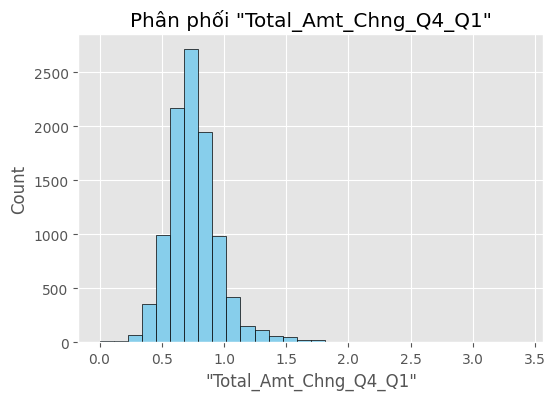

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


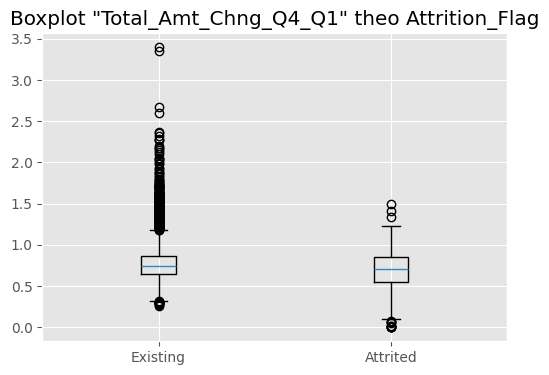

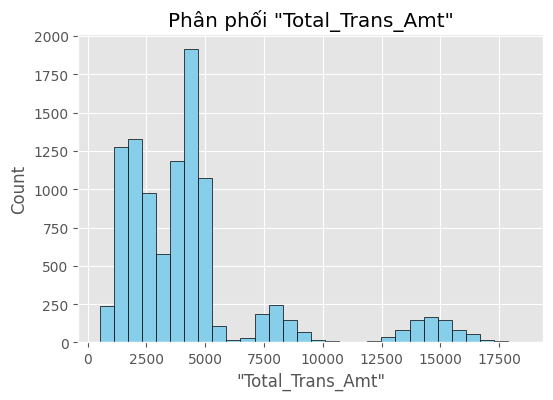

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


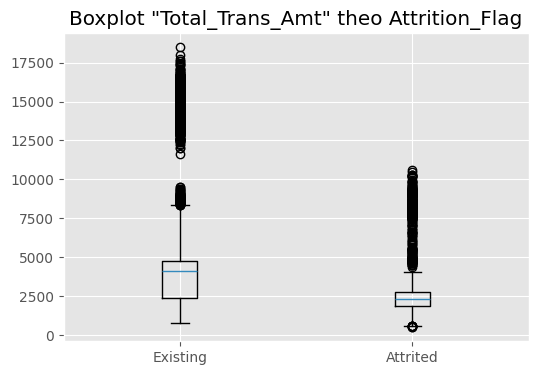

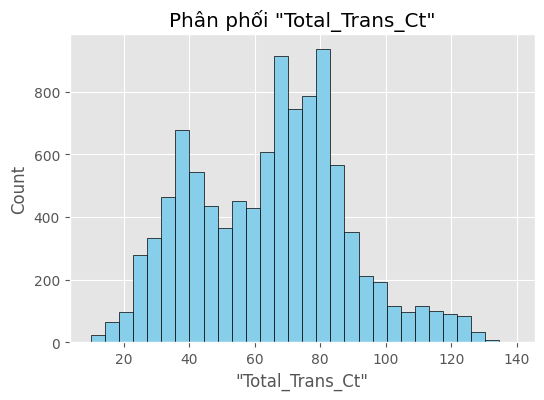

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


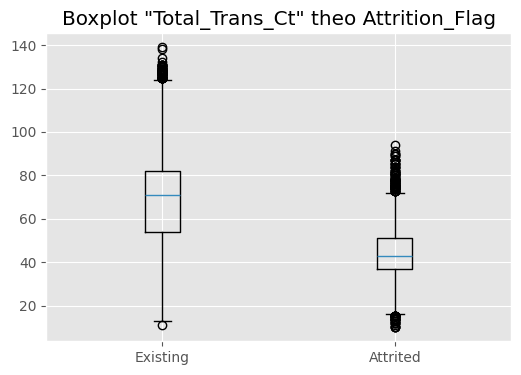

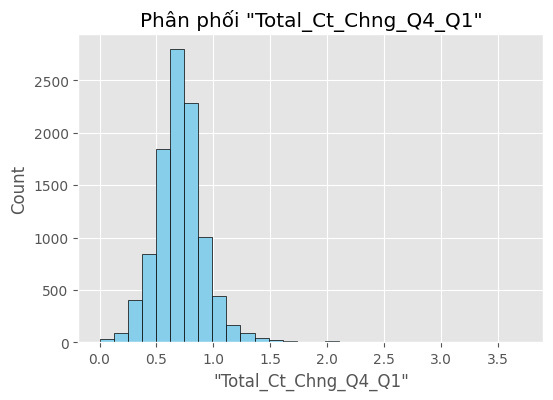

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


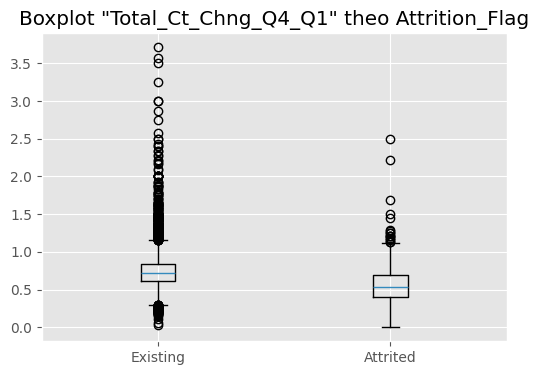

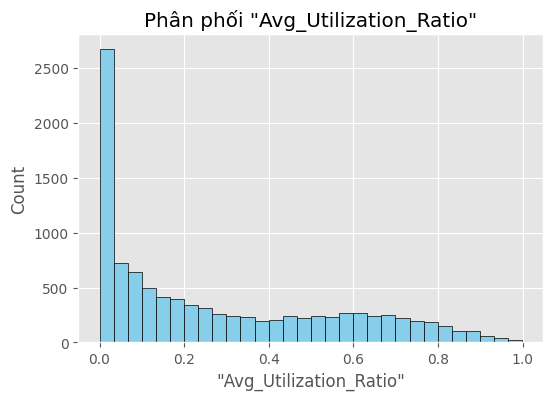

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


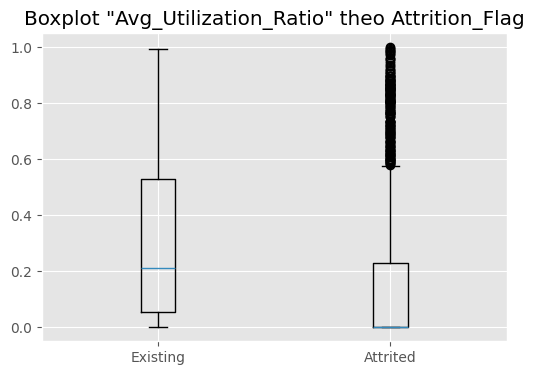

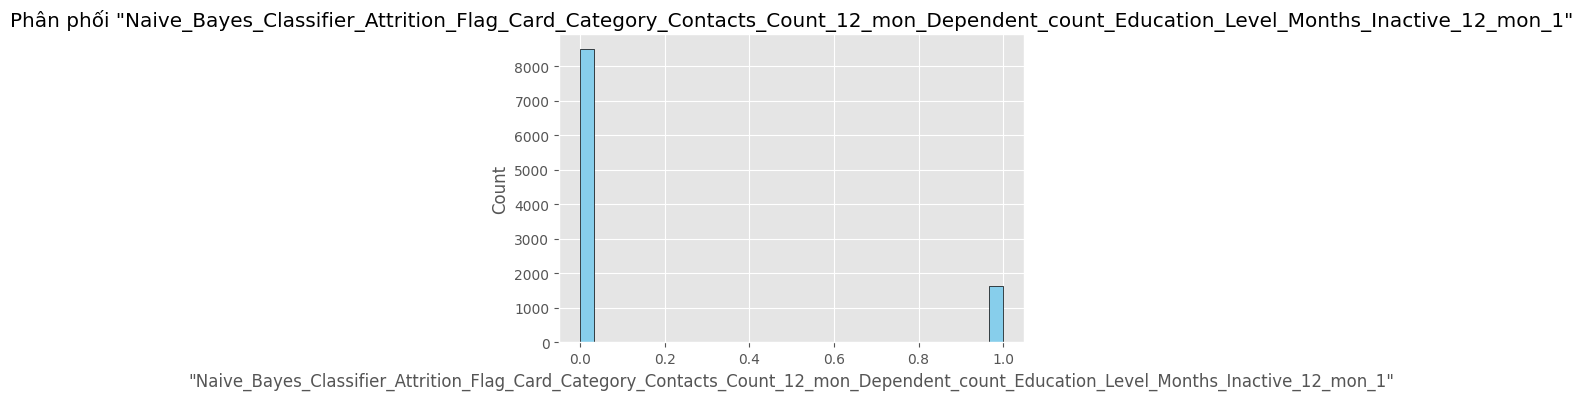

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


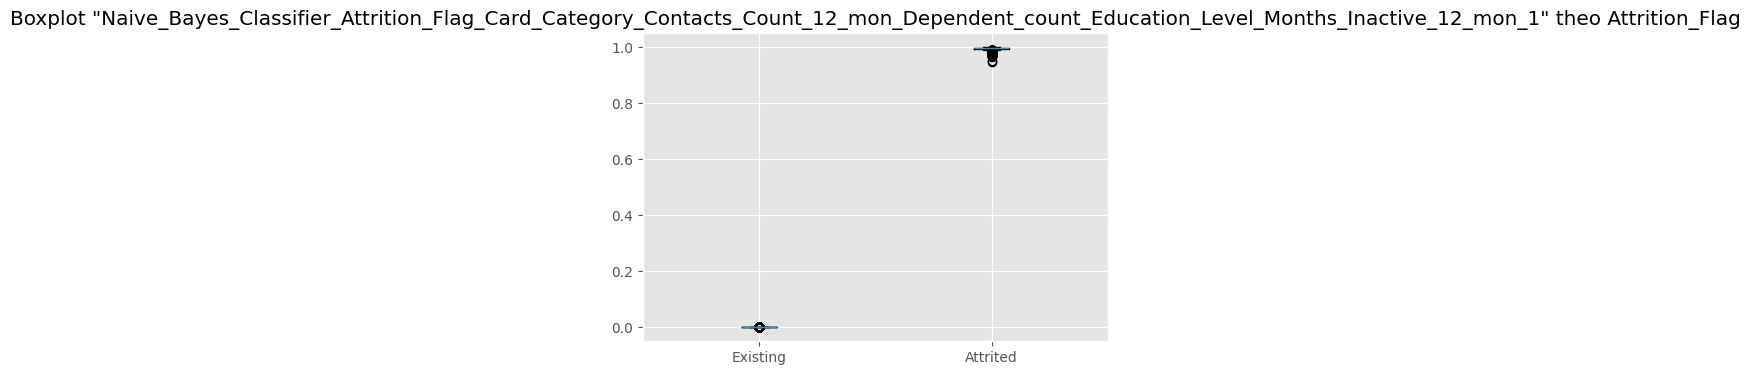

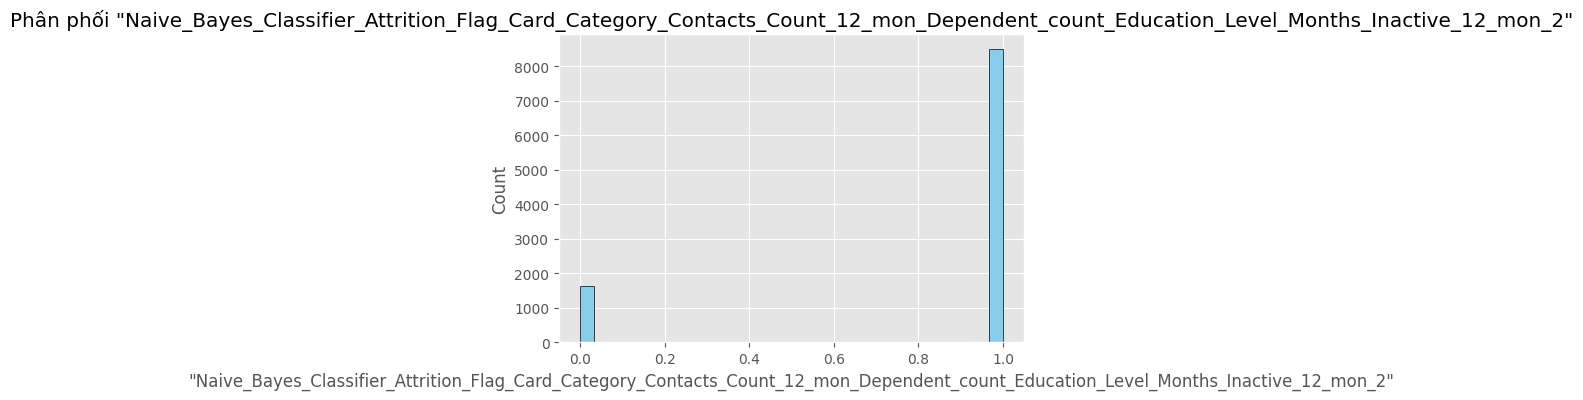

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\1820919721.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([existing, attrited], labels=['Existing','Attrited'])


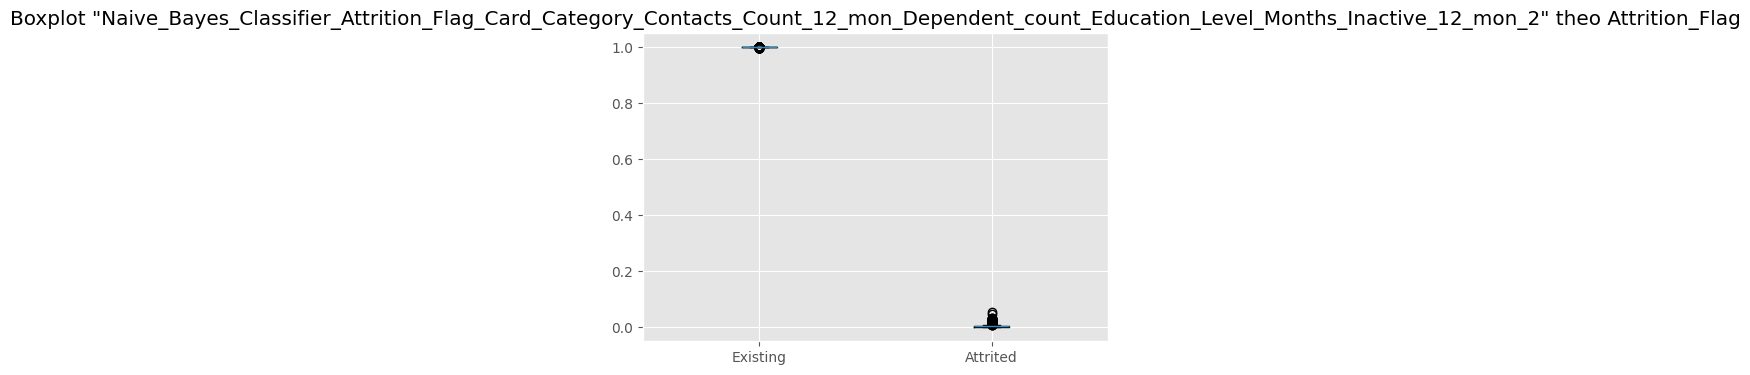

In [ ]:
# 05. Histogram và Boxplot các cột số

for i, col in enumerate(num_cols):
    # Histogram
    plt.figure(figsize=(6,4))
    plt.hist(num_data[:, i], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Phân phối {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    
    # Boxplot theo Attrition_Flag
    existing = num_data[attrition_flag=='Existing Customer', i]
    attrited = num_data[attrition_flag=='Attrited Customer', i]
    plt.figure(figsize=(6,4))
    plt.boxplot([existing, attrited], labels=['Existing','Attrited'])
    plt.title(f"Boxplot {col} theo Attrition_Flag")
    plt.show()



Phân bố Gender:
F: 5358 (52.9%)
M: 4769 (47.1%)


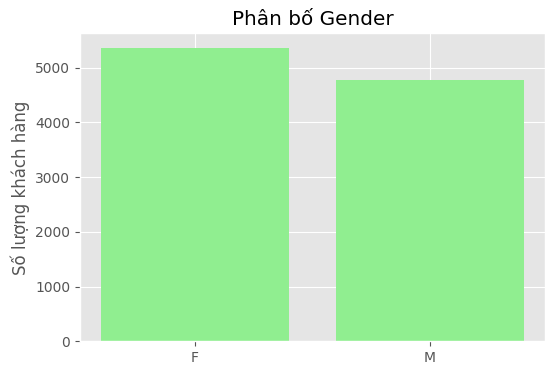

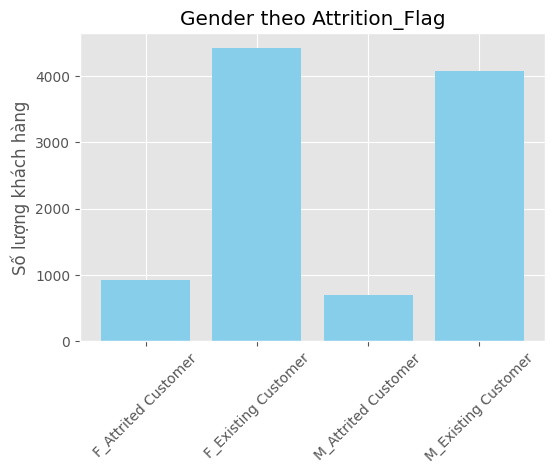


Phân bố Education_Level:
College: 1013 (10.0%)
Doctorate: 451 (4.5%)
Graduate: 3128 (30.9%)
High School: 2013 (19.9%)
Post-Graduate: 516 (5.1%)
Uneducated: 1487 (14.7%)
Unknown: 1519 (15.0%)


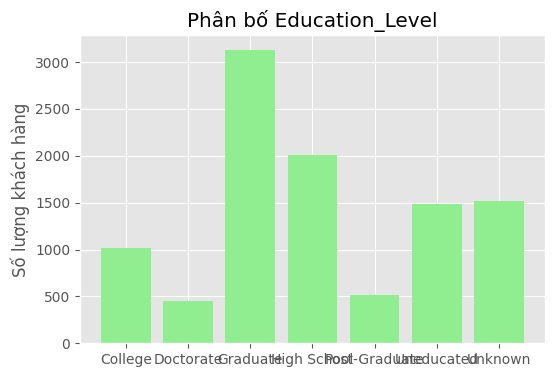

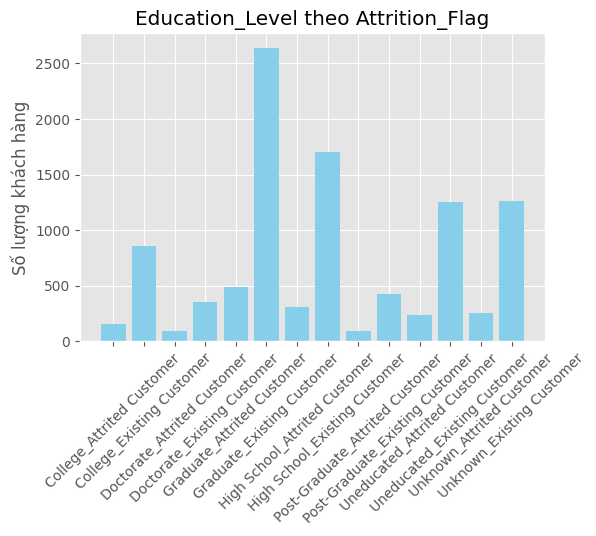


Phân bố Marital_Status:
Divorced: 748 (7.4%)
Married: 4687 (46.3%)
Single: 3943 (38.9%)
Unknown: 749 (7.4%)


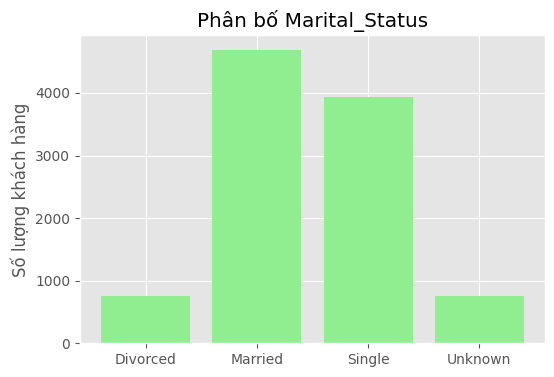

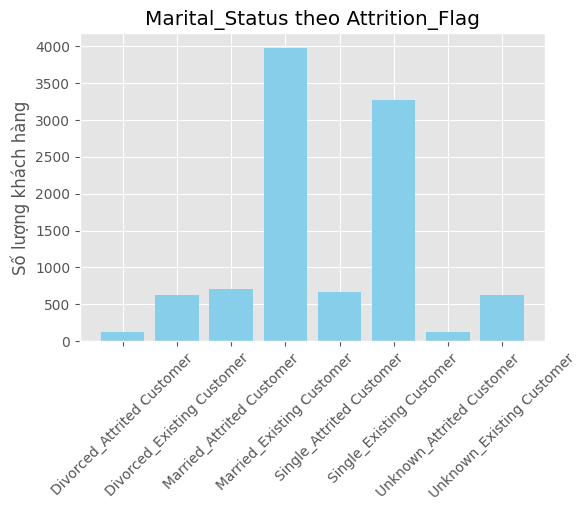


Phân bố Income_Category:
$120K +: 727 (7.2%)
$40K - $60K: 1790 (17.7%)
$60K - $80K: 1402 (13.8%)
$80K - $120K: 1535 (15.2%)
Less than $40K: 3561 (35.2%)
Unknown: 1112 (11.0%)


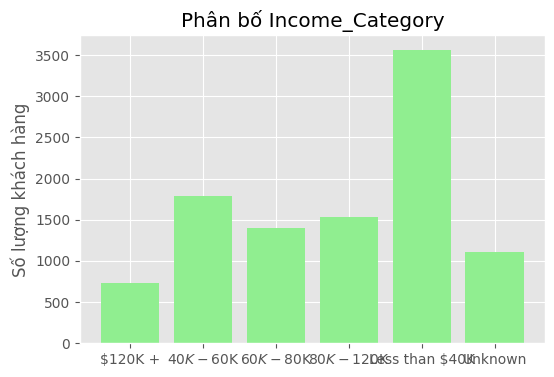

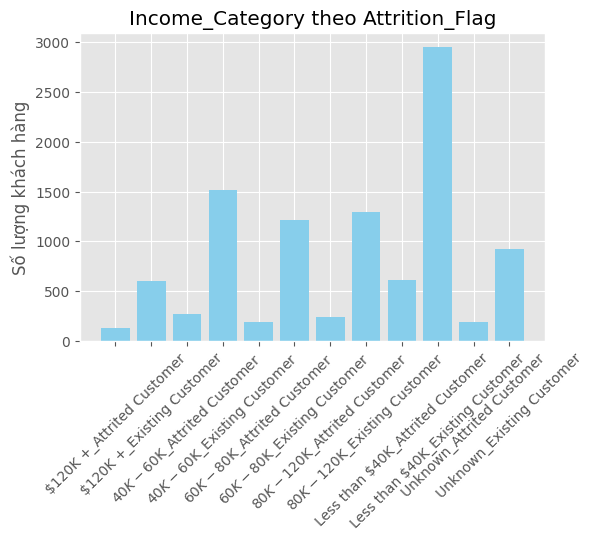


Phân bố Card_Category:
Blue: 9436 (93.2%)
Gold: 116 (1.1%)
Platinum: 20 (0.2%)
Silver: 555 (5.5%)


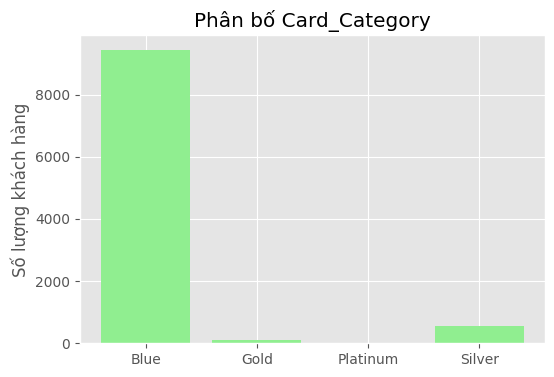

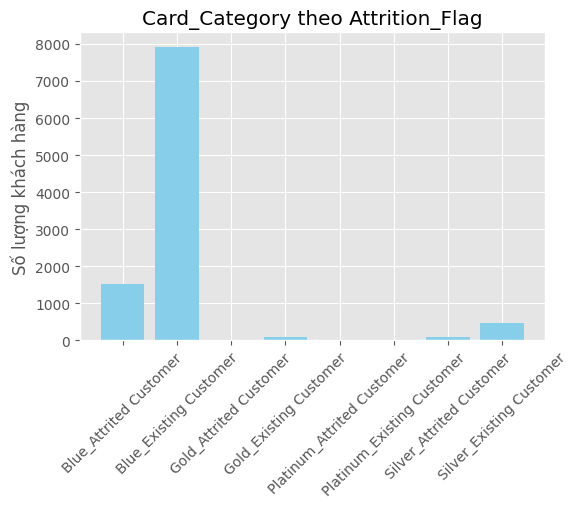

In [ ]:
# 06. EDA cho các cột chữ (categorical)

# 1. Chuẩn hóa header (loại bỏ dấu ")
header_clean = [h.strip().replace('"','') for h in lines[0].strip().split(',')]
cat_cols = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

for col in cat_cols:
    col_idx = header_clean.index(col)  # dùng header đã clean
    col_data = np.array([row[col_idx].replace('"','') for row in data_raw])  # cột chữ
    
    # Thống kê phân bố
    unique, counts = np.unique(col_data, return_counts=True)
    print(f"\nPhân bố {col}:")
    for u, c in zip(unique, counts):
        print(f"{u}: {c} ({c/len(col_data)*100:.1f}%)")
    
    # Bar chart tổng thể
    plt.figure(figsize=(6,4))
    plt.bar(unique, counts, color='lightgreen')
    plt.title(f"Phân bố {col}")
    plt.ylabel("Số lượng khách hàng")
    plt.show()
    
    # Bar chart phân nhóm theo Attrition_Flag
    plt.figure(figsize=(6,4))
    for u in unique:
        mask = col_data == u
        class_counts = np.unique(attrition_flag[mask], return_counts=True)
        labels = class_counts[0]
        vals = class_counts[1]
        plt.bar([f"{u}_{lbl}" for lbl in labels], vals, color='skyblue')
    plt.title(f"{col} theo Attrition_Flag")
    plt.xticks(rotation=45)
    plt.ylabel("Số lượng khách hàng")
    plt.show()


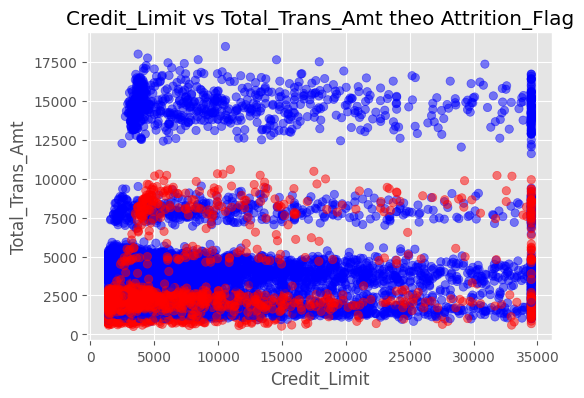

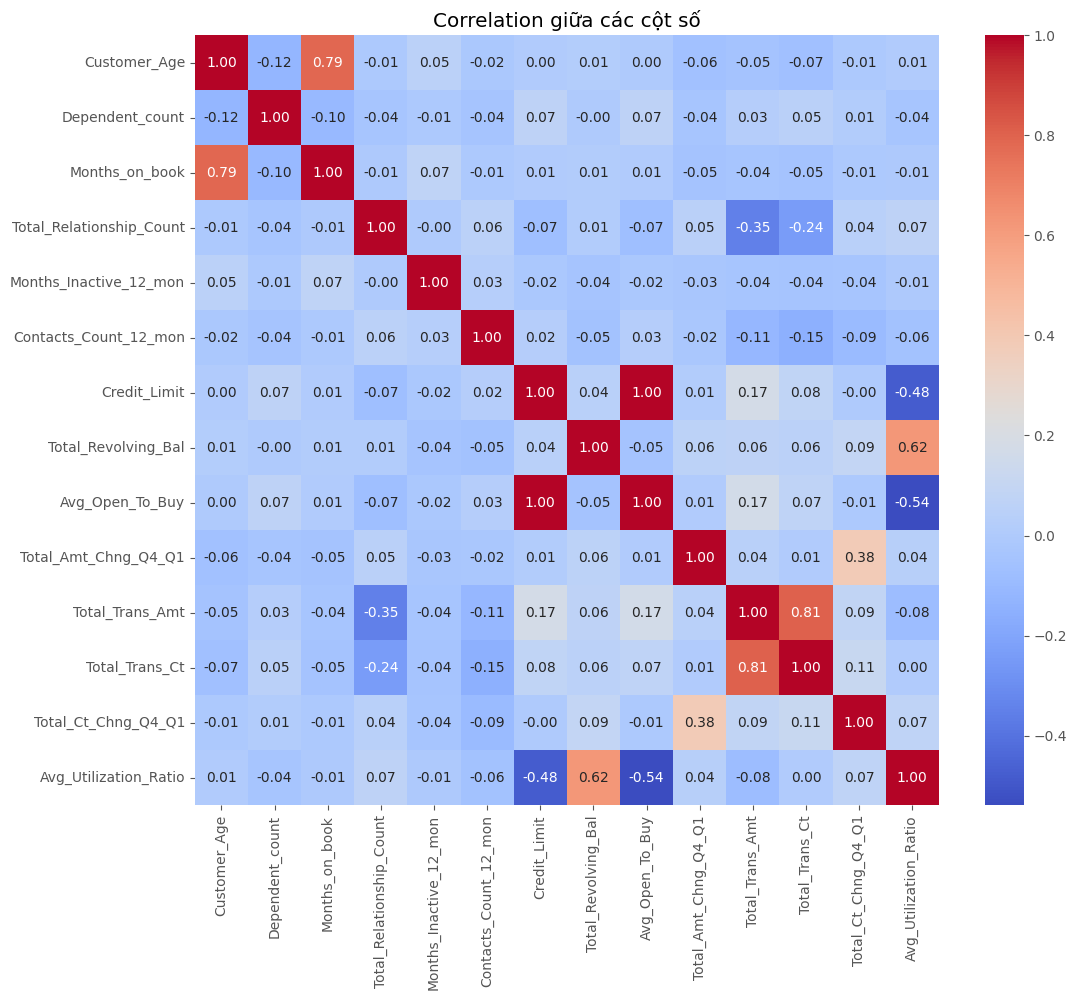

In [19]:
# 07. Scatter plot & Correlation heatmap

# Các cột số quan trọng để scatter/correlation
num_cols_full = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                 'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
                 'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
                 'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

# Lấy index trong header_clean
num_idx_full = [header_clean.index(c) for c in num_cols_full]

# Chuyển sang float
num_data_full = np.array([[float(row[i]) for i in num_idx_full] for row in data_raw])

# 1. Scatter plot: Credit_Limit vs Total_Trans_Amt
credit_idx = num_cols_full.index('Credit_Limit')
trans_idx = num_cols_full.index('Total_Trans_Amt')

plt.figure(figsize=(6,4))
plt.scatter(num_data_full[:, credit_idx],
            num_data_full[:, trans_idx],
            c=np.where(attrition_flag=='Attrited Customer', 'red', 'blue'),
            alpha=0.5)
plt.xlabel("Credit_Limit")
plt.ylabel("Total_Trans_Amt")
plt.title("Credit_Limit vs Total_Trans_Amt theo Attrition_Flag")
plt.show()

# 2. Correlation heatmap giữa các cột số
corr_matrix = np.corrcoef(num_data_full.T)
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, xticklabels=num_cols_full, yticklabels=num_cols_full, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation giữa các cột số")
plt.show()
